# Import the data

In [1]:
# importing the data
import pandas as pd
import numpy as np
import sqlite3
df = pd.read_csv("data/kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ M

# Check for dupes

In [3]:
# look for duplicates - no dupes
duplicate_rows_df = df[df.duplicated()]
print(len(duplicate_rows_df))

0


# Extraneous values

In [4]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [5]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is majority of values
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [6]:
# check it worked
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

# Null values

In [7]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# drop waterfront and view since I don't care about those
df = df.drop('waterfront', axis=1)
df = df.drop('view', axis=1)
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17789507802009538
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [10]:
# convert nan to 0 
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0

In [11]:
# check it worked -- converting the 0 did not just come in as '0' , it came in correctly as 0.0
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
# check it worked - null values filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.1+ MB


In [13]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

# DEALING WITH CATEGORICAL DATA AND CREATING DUMMY VARIABLES:

In [15]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

# Create new columns based on conditions

In [16]:
# creating column "class_scale" based on condition of price
df.loc[df['price'] > 750000, 'class_scale'] = "upper"
df.loc[(df['price'] < 750000) & (df['price'] > 350000), 'class_scale'] = "middle"
df.loc[df['price'] < 350000, 'class_scale'] = "lower"

In [17]:
grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()
grouped.head()

price                                grade             
                  mean       min        max       std  mean min max  std
class_scale                                                             
lower         267015.0   78000.0   349990.0   54355.0   7.0   3  10  1.0
middle        513097.0  350500.0   749999.0  107887.0   8.0   4  11  1.0
upper        1134069.0  750500.0  7700000.0  526345.0   9.0   5  13  1.0

In [18]:
# upper class = 17%
# middle class = 52% 
# lower class = 31%
df.class_scale.value_counts()

middle    11145
lower      6614
upper      3579
Name: class_scale, dtype: int64

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,lower
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,middle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,lower
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,middle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,middle


In [28]:
pd.get_dummies(df, columns=['class_scale'], drop_first=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale_middle,class_scale_upper
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,1,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,1,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,0


# Save df with Pickle

In [29]:
# cleaned and added class_scale dummy variables
# did not remove outliers yet
import pickle

In [30]:
# save it with...
df.to_pickle('cleaned_df.pkl')

In [31]:
# load it with...
df1 = pd.read_pickle('cleaned_df.pkl')

In [32]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,lower
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,middle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,lower
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,middle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,middle


# EDA with visualizations

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\15514\anaco

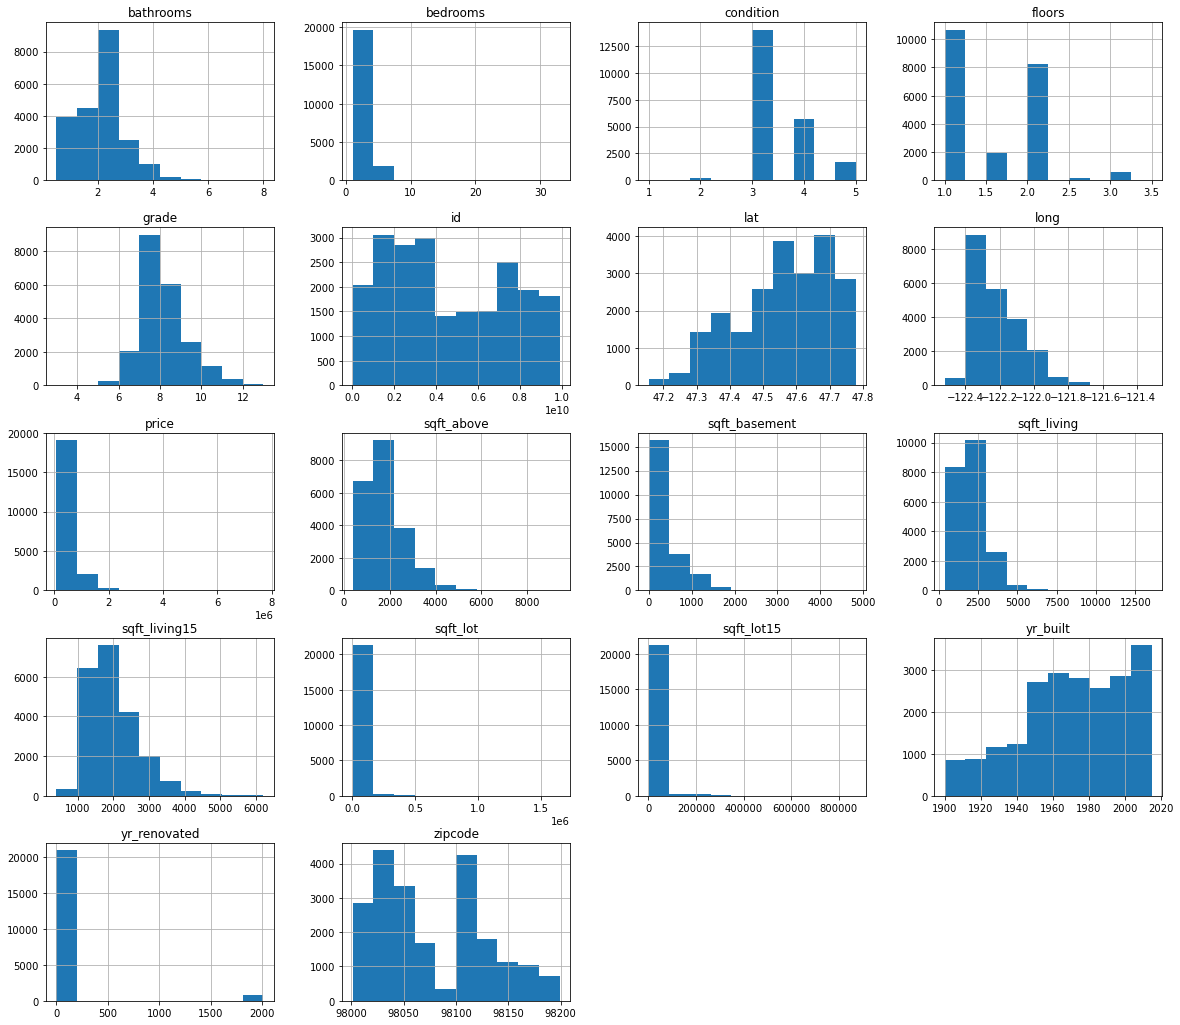

In [38]:
# create histograms for all numeric columns to get idea of distributions
df.hist(figsize = (20,18));

Check distributions of features
- closest one to being normal is sqft_living15

Log scale and make them all normally distributed

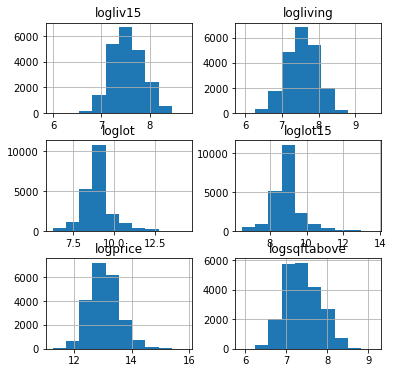

In [39]:
import numpy as np
data_log = pd.DataFrame([])
data_log['logprice'] = np.log(df['price'])
data_log['logliving'] = np.log(df['sqft_living'])
data_log['loglot'] = np.log(df['sqft_lot'])
data_log['logliv15'] = np.log(df['sqft_living15'])
data_log['logsqftabove'] = np.log(df['sqft_above'])
data_log['loglot15'] = np.log(df['sqft_lot15'])
data_log.hist(figsize  = [6, 6]);

In [46]:
data_log.describe().round()

,logprice,logliving,loglot,logliv15,logsqftabove,loglot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,13.0,8.0,9.0,8.0,7.0,9.0
std,1.0,0.0,1.0,0.0,0.0,1.0
min,11.0,6.0,6.0,6.0,6.0,6.0
25%,13.0,7.0,9.0,7.0,7.0,9.0
50%,13.0,8.0,9.0,8.0,7.0,9.0
75%,13.0,8.0,9.0,8.0,8.0,9.0
max,16.0,10.0,14.0,9.0,9.0,14.0


Now perform min-max scaling

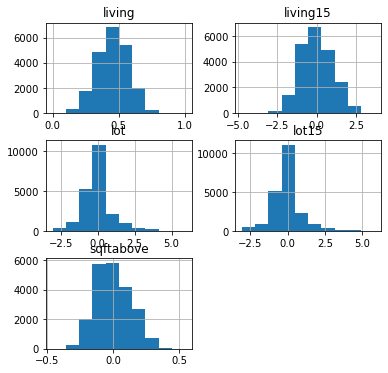

In [43]:
# just giving them a variable name
logprice = data_log['logprice']
logliv = data_log['logliving']
loglot = data_log['loglot']
logliv15 = data_log['logliv15']
logsqftabove = data_log['logsqftabove']
loglot15 = data_log['loglot15']


# min-max scaling
scaled_living = (logliv - min(logliv)) / (max(logliv) - min(logliv))
# standardization 
scaled_lot = (loglot - np.mean(loglot)) / np.sqrt(np.var(loglot))
scaled_lot15 = (loglot15 - np.mean(loglot15)) / np.sqrt(np.var(loglot15))
scaled_living15 = (logliv15 - np.mean(logliv15)) / np.sqrt(np.var(logliv15))
# mean normalization
scaled_sqftabove = (logsqftabove - np.mean(logsqftabove)) / (max(logsqftabove) - min(logsqftabove))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['living'] = scaled_living
data_cont_scaled['lot'] = scaled_lot
data_cont_scaled['living15'] = scaled_living15
data_cont_scaled['sqftabove'] = scaled_sqftabove
data_cont_scaled['lot15'] = scaled_lot15

data_cont_scaled.hist(figsize = [6, 6]);

In [73]:
# did not yet normalize price bc I want to split it by class first then normalize for each
data_cont_scaled.to_pickle('normalized_df.pkl')

In [45]:
data_cont_scaled.describe().round()

,living,lot,living15,sqftabove,lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0
mean,0.0,-0.0,-0.0,0.0,-0.0
std,0.0,1.0,1.0,0.0,1.0
min,0.0,-3.0,-5.0,-0.0,-3.0
25%,0.0,-1.0,-1.0,-0.0,-1.0
50%,0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,0.0,1.0,0.0,0.0
max,1.0,6.0,4.0,1.0,6.0


# SKLearn Standardization and Min-Max scaling: 

In [48]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['sqft_living', 'sqft_lot','sqft_living15','sqft_above','sqft_lot15']])
df_std = std_scale.transform(df[['sqft_living', 'sqft_lot','sqft_living15','sqft_above','sqft_lot15']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['sqft_living', 'sqft_lot','sqft_living15','sqft_above','sqft_lot15']])
df_minmax = minmax_scale.transform(df[['sqft_living', 'sqft_lot','sqft_living15','sqft_above','sqft_lot15']])

In [49]:
print('Mean after standardization:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,2].mean(), df_std[:,3].mean(), df_std[:,4].mean()))
print('\nStandard deviation after standardization:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].std(), df_std[:,3].std(), df_std[:,4].std()))

Mean after standardization:
sqft_living=-0.00, sqft_lot=0.00, sqft_living15=0.00, sqft_above=0.00, sqft_lot15=0.00

Standard deviation after standardization:
sqft_living=1.00, sqft_lot=1.00, sqft_living15=1.00, sqft_above=1.00, sqft_lot15=1.00


In [50]:
print('Min-value after min-max scaling:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min(), df_minmax[:,3].min(), df_minmax[:,4].min()))
print('\nMax-value after min-max scaling:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max(), df_minmax[:,3].max(), df_minmax[:,4].max()))

Min-value after min-max scaling:
sqft_living=0.00, sqft_lot=0.00, sqft_living15=0.00, sqft_above=0.00, sqft_lot15=0.00

Max-value after min-max scaling:
sqft_living=1.00, sqft_lot=1.00, sqft_living15=1.00, sqft_above=1.00, sqft_lot15=1.00


# Check for multicolinearity:

In [52]:
# checking for multicolinearity across those that had highest linear correlation
# keep grade, bedrooms, bathrooms
# grade, sqft_living15, and sqft_above all have too high multicolinearity (above 65%) so only need one
feats = ['bathrooms','bedrooms', 'grade' ,'sqft_above', 'sqft_living15','sqft_lot15']
corr = df[feats].corr()
corr

,bathrooms,bedrooms,grade,sqft_above,sqft_living15,sqft_lot15
bathrooms,1.000000,0.514508,0.665838,0.686668,0.569884,0.088303
bedrooms,0.514508,1.000000,0.356563,0.479386,0.393406,0.030690
grade,0.665838,0.356563,1.000000,0.756073,0.713867,0.120981
sqft_above,0.686668,0.479386,0.756073,1.000000,0.731767,0.195077
sqft_living15,0.569884,0.393406,0.713867,0.731767,1.000000,0.183515
sqft_lot15,0.088303,0.030690,0.120981,0.195077,0.183515,1.000000


high multicolinearity:
- sqft_above
- grade
- sqft_living15

# Vanilla model:

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     4746.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:04:14   Log-Likelihood:            -3.0192e+05
No. Observations:               21597   AIC:                         6.039e+05
Df Residuals:                   21593   BIC:                         6.039e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.938e+05   7979.956    -24.283      0.000   -2.09e+05   -1.78e+05
bedrooms      -2293.0687   2468.522     -0.929      0.353   -7131.554    2545.417
bathrooms      1.373e+05   3326.840     41.271      0.000    1.31e+05    1.44e+05
sqft_living15   227.1709      3.482     65.238      0.000     220.346     233.996
==============================================================================
Omnibus:                    18847.680   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1490852.745
Skew:                           3.820   Prob(JB):                         0.00
Kurtosis:                      42.980   Cond. No.                     8.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
baseline = ols(formula="price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_basement + yr_built + yr_renovated + sqft_lot15", data=df).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     3194.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:38:56   Log-Likelihood:            -2.9696e+05
No. Observations:               21597   AIC:                         5.939e+05
Df Residuals:                   21585   BIC:                         5.940e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.634e+06   1.43e+05     46.535      0.000    6.35e+06    6.91e+06
bedrooms       -4.92e+04   2122.319    -23.181      0.000   -5.34e+04    -4.5e+04
bathrooms      4.639e+04   3666.460     12.653      0.000    3.92e+04    5.36e+04
sqft_living     182.7683      3.675     49.727      0.000     175.564     189.972
sqft_lot         -0.0117      0.054     -0.217      0.828      -0.117       0.094
floors         2.741e+04   3909.768      7.011      0.000    1.97e+04    3.51e+04
condition      2.117e+04   2612.412      8.102      0.000     1.6e+04    2.63e+04
grade          1.323e+05   2256.236     58.622      0.000    1.28e+05    1.37e+05
sqft_basement    23.1912      4.587      5.056      0.000      14.200      32.182
yr_built      -3822.4326     73.046    -52.329      0.000   -3965.609   -3679.257
yr_renovated     24.1708      4.460      5.419      0.000      15.429      32.913
sqft_lot15       -0.4666      0.082     -5.686      0.000      -0.627      -0.306
==============================================================================
Omnibus:                    17292.849   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1209902.876
Skew:                           3.349   Prob(JB):                         0.00
Kurtosis:                      39.051   Cond. No.                     4.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now I want to split the df by class_scale and run separate models

# Upper-class DF:

In [62]:
upper_df = df.loc[df['class_scale']== 'upper']
upper_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,upper
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,3,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,upper
26,1794500383,2014-06-26,937000.0,3,1.75,2450,2691,2.0,3,8,1750,700.0,1915,0.0,98119,47.6386,-122.360,1760,3573,upper
41,7766200013,2014-08-11,775000.0,4,2.25,4220,24186,1.0,3,8,2600,1620.0,1984,0.0,98166,47.4450,-122.347,2410,30617,upper
42,7203220400,2014-07-07,861990.0,5,2.75,3595,5639,2.0,3,9,3595,0.0,2014,0.0,98053,47.6848,-122.016,3625,5639,upper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21577,8672200110,2015-03-17,1090000.0,5,3.75,4170,8142,2.0,3,10,4170,0.0,2006,0.0,98056,47.5354,-122.181,3030,7980,upper
21581,191100405,2015-04-21,1580000.0,4,3.25,3410,10125,2.0,3,10,3410,0.0,2007,0.0,98040,47.5653,-122.223,2290,10125,upper
21583,7202300110,2014-09-15,810000.0,4,3.00,3990,7838,2.0,3,9,3990,0.0,2003,0.0,98053,47.6857,-122.046,3370,6814,upper
21584,249000205,2014-10-15,1540000.0,5,3.75,4470,8088,2.0,3,11,4470,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964,upper


In [64]:
upper_df.to_pickle('upper_df1.pkl')

In [63]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=upper_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     352.7
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          1.26e-200
Time:                        00:07:44   Log-Likelihood:                -51763.
No. Observations:                3579   AIC:                         1.035e+05
Df Residuals:                    3575   BIC:                         1.036e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.318e+05   4.18e+04      3.153      0.002    4.98e+04    2.14e+05
bedrooms      -1.124e+04   9732.767     -1.155      0.248   -3.03e+04    7845.811
bathrooms      2.531e+05    1.1e+04     23.103      0.000    2.32e+05    2.75e+05
sqft_living15   117.7250     10.209     11.531      0.000      97.708     137.742
==============================================================================
Omnibus:                     2422.257   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54415.820
Skew:                           2.900   Prob(JB):                         0.00
Kurtosis:                      21.200   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Middle-class df:

In [65]:
middle_df = df.loc[df['class_scale']== 'middle']
middle_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,middle
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,middle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,middle
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,middle
11,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,4,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,middle
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,middle
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,middle
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,middle


In [66]:
middle_df.to_pickle('middle_df1.pkl')

In [67]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=middle_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     480.9
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          7.05e-294
Time:                        00:13:16   Log-Likelihood:            -1.4429e+05
No. Observations:               11145   AIC:                         2.886e+05
Df Residuals:                   11141   BIC:                         2.886e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.619e+05   4540.087     79.702      0.000    3.53e+05    3.71e+05
bedrooms       3229.5078   1171.742      2.756      0.006     932.686    5526.330
bathrooms      1.482e+04   1747.007      8.481      0.000    1.14e+04    1.82e+04
sqft_living15    55.4606      1.978     28.034      0.000      51.583      59.338
==============================================================================
Omnibus:                      740.337   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.679
Skew:                           0.323   Prob(JB):                     1.48e-90
Kurtosis:                       2.311   Cond. No.                     9.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Lower-class df:

In [68]:
lower_df = df.loc[df['class_scale']== 'lower']
lower_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,lower
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,lower
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,lower
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,lower
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21556,6056111067,2014-07-07,230000.0,3,1.75,1140,1201,2.0,3,8,1140,0.0,2014,0.0,98108,47.5637,-122.295,1210,1552,lower
21569,3832050760,2014-08-28,270000.0,3,2.50,1870,5000,2.0,3,7,1870,0.0,2009,0.0,98042,47.3339,-122.055,2170,5399,lower
21573,7570050450,2014-09-10,347500.0,3,2.50,2540,4760,2.0,3,8,2540,0.0,2010,0.0,98038,47.3452,-122.022,2540,4571,lower
21586,844000965,2014-06-26,224000.0,3,1.75,1500,11968,1.0,3,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303,lower


In [69]:
lower_df.to_pickle('lower_df1.pkl')

In [70]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=lower_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     460.8
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          7.00e-272
Time:                        00:15:30   Log-Likelihood:                -80871.
No. Observations:                6614   AIC:                         1.617e+05
Df Residuals:                    6610   BIC:                         1.618e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.796e+05   2917.245     61.575      0.000    1.74e+05    1.85e+05
bedrooms       1339.5642    859.424      1.559      0.119    -345.185    3024.313
bathrooms      2.224e+04   1193.848     18.627      0.000    1.99e+04    2.46e+04
sqft_living15    28.3607      1.752     16.191      0.000      24.927      31.794
==============================================================================
Omnibus:                       92.384   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.032
Skew:                          -0.286   Prob(JB):                     2.31e-21
Kurtosis:                       2.863   Cond. No.                     7.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Identify urban vs. rural areas:

In [34]:
houses_per_zc = df['zipcode'].value_counts().sort_values(ascending=False)
houses_per_zc[:30]

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
Name: zipcode, dtype: int64

In [ ]:
df['urban_rural'] = df['zipcode'].value_counts().sort_values(ascending=False) >


In [26]:
df['urban_rural'] = ["urban" if x > 316 else "rural" for x in df['zipcode'].value_counts().sort_values(ascending=False)] 

ValueError: Length of values does not match length of index

In [126]:
houses_per_zc[:40]

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
98065    308
98122    290
98146    288
98028    283
98008    283
98040    282
98198    280
98003    280
98072    273
98031    273
Name: zipcode, dtype: int64

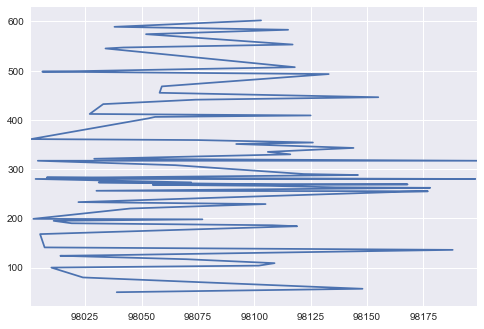

In [124]:
gdf['city_urban'] = gdf(gdf['houses_per_zc'] > 34

# Zipcode by class

In [210]:
grouped_zip = df.groupby(['zipcode'])['class_scale'].value_counts()
grouped_zip

zipcode  class_scale
98001    3.0            292
         2.0             67
         1.0              1
98002    3.0            196
         2.0              3
                       ... 
98198    2.0             54
         1.0              8
98199    2.0            176
         1.0            133
         3.0              6
Name: class_scale, Length: 195, dtype: int64

# create dummy variable for class_scale 
- 100 = lower
- 010 = middle
- 001 = upper

# Dealing with Outliers

In [18]:
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

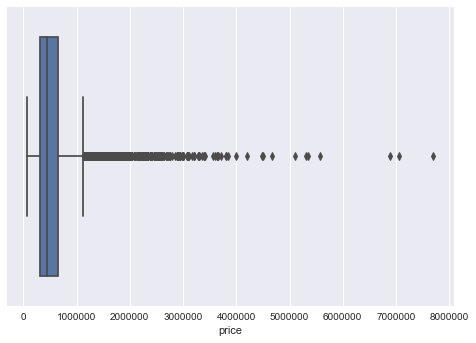

In [19]:
sns.boxplot(x=df['price'])

In [20]:
# calculate summary statistics
data_mean, data_std = mean(df.price), std(df.price)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [21]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]

In [22]:
sorted(outliers)

[1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1670000.0,
 1670000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1720000.0,
 1720000.0,
 1720000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 175

In [23]:
#subset msrp to eliminate outliers --- this is how we would do it, but don't want to yet
# df = df[df.price < 1650000.0]

In [24]:
# .round() takes it out of scientific notation
df['price'].describe().round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

In [25]:
# convert date to date from string


C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


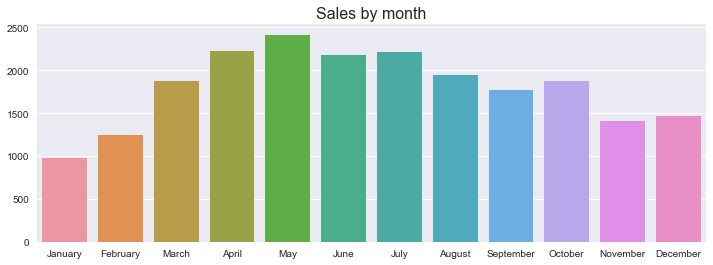

In [26]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


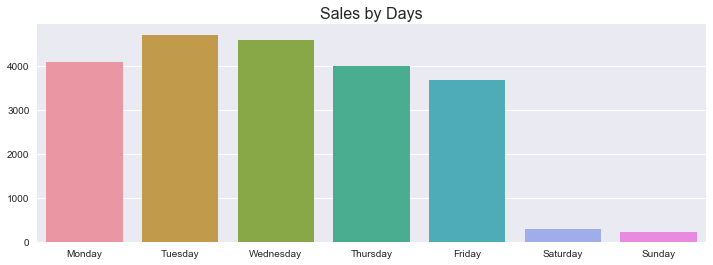

In [27]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales = []

for i in range(0,7):
    daily_sales.append(sum(df.date.dt.dayofweek == i))

plt.figure(figsize=(12,4))
sns.barplot(day_of_week,daily_sales)
plt.title('Sales by Days', fontdict={'fontsize': 16})
plt.show()

# Homoscedasticity

Check Linearity for each column. Does col[x] have a linear relationship with price?

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


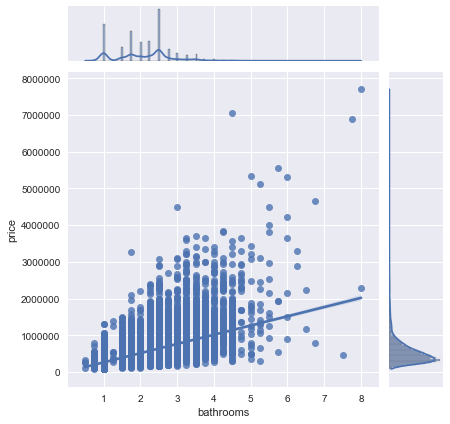

In [32]:
# use jointplot to check for linearity 
sns.jointplot('bathrooms','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


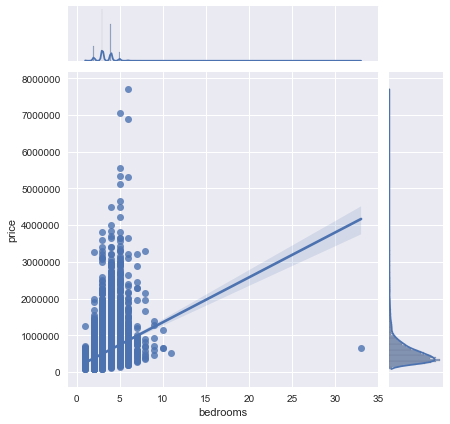

In [33]:
sns.jointplot('bedrooms','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


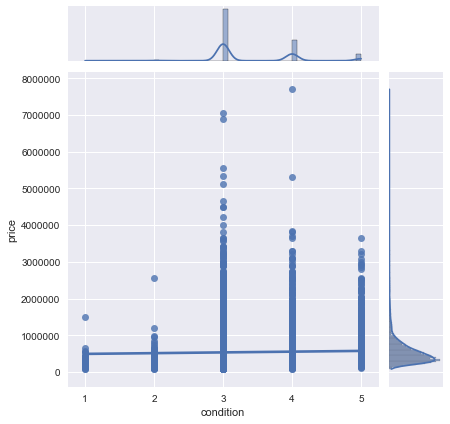

In [34]:
sns.jointplot('condition','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


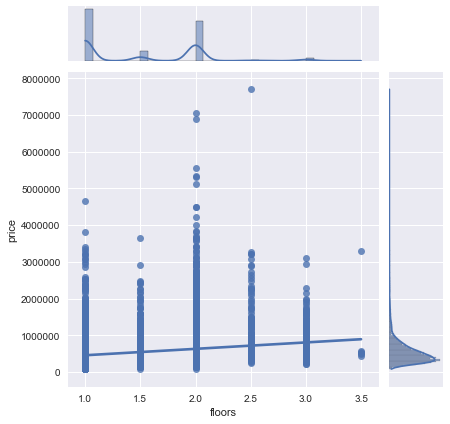

In [35]:
sns.jointplot('floors','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


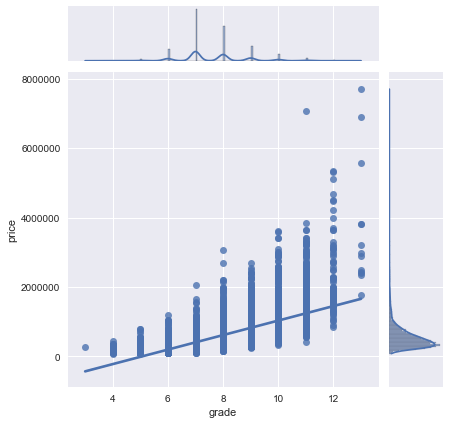

In [36]:
sns.jointplot('grade','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


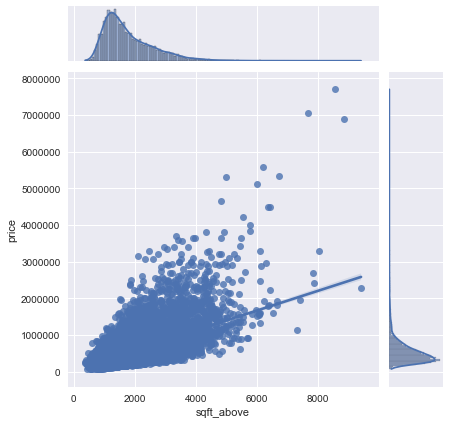

In [37]:
sns.jointplot('sqft_above','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


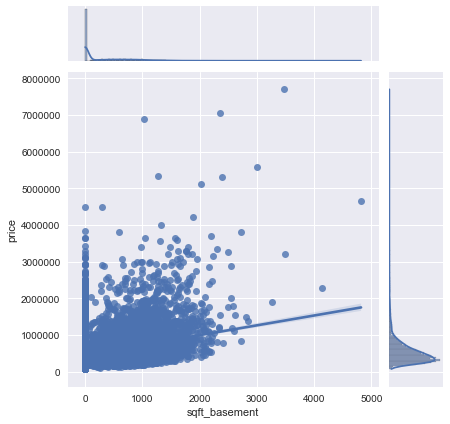

In [38]:
sns.jointplot('sqft_basement','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


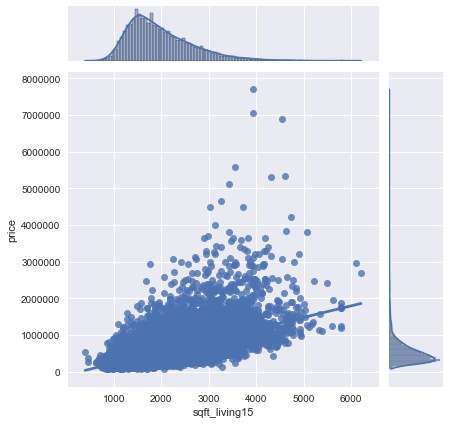

In [39]:
sns.jointplot('sqft_living15','price', data=df, kind='reg');

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


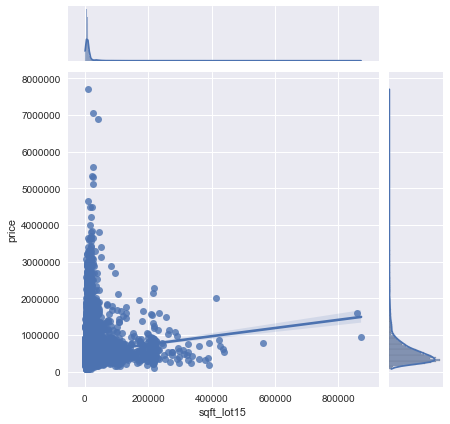

In [40]:
sns.jointplot('sqft_lot15','price', data=df, kind='reg');

# Multicolinearity: 'bathrooms','bedrooms', 'grade' ,'sqft_above', 'sqft_living15','sqft_lot15' have strong linear relationships to price

floors and condition have little to no linear relationship to price

# Check with heatmap:

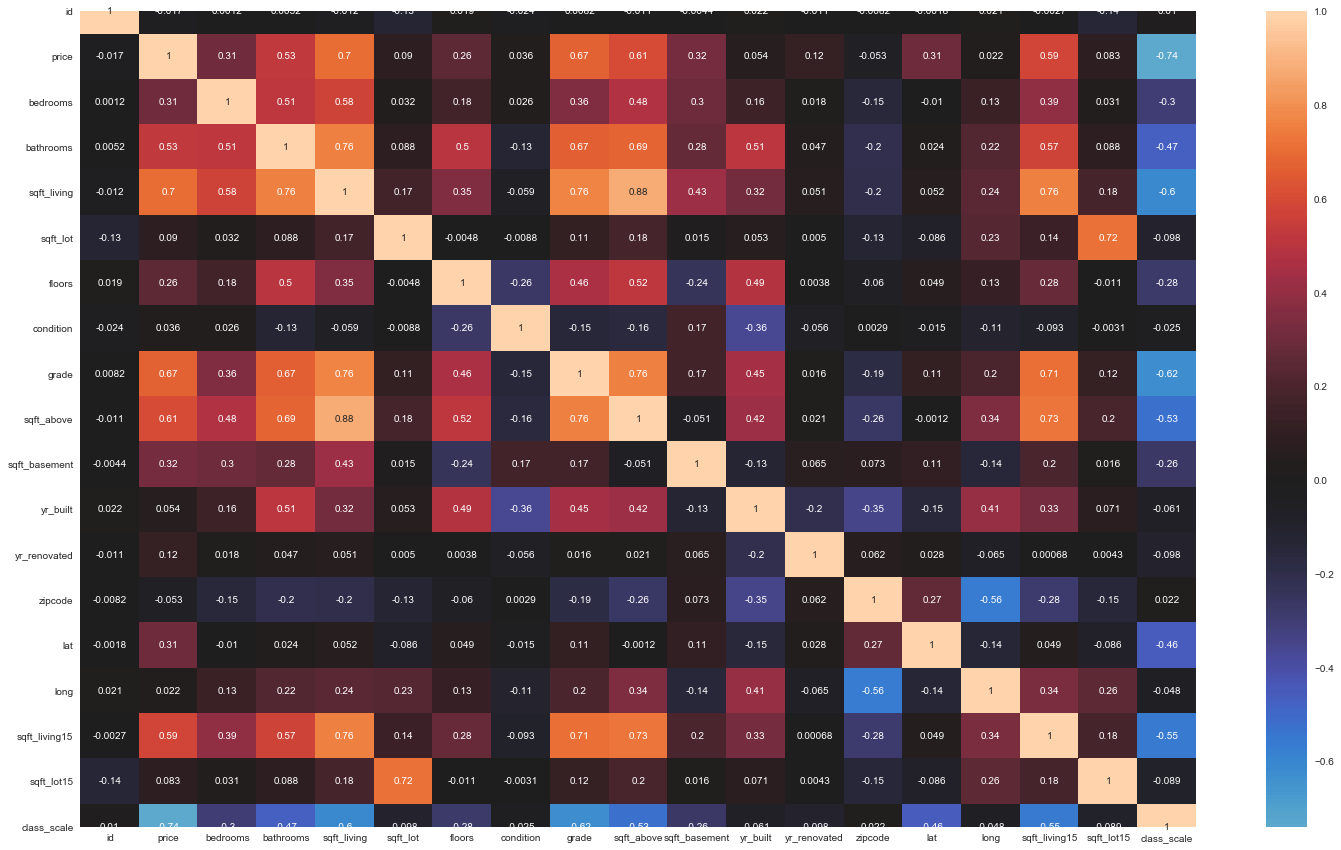

In [42]:

plt.figure(figsize=[25,15])
sns.heatmap(df.corr(), center=0, annot=True);

# Check multicolinearity with The Variance Inflation

In [35]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

TypeError: '>=' not supported between instances of 'str' and 'float'

# Vanilla Model

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [47]:
f = 'price~sqft_living'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:54:17   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model.params

Intercept     -43988.892194
sqft_living      280.863014
dtype: float64

   sqft_living
0          0.5
1          8.0
0   -43848.460687
1   -41741.988079
dtype: float64


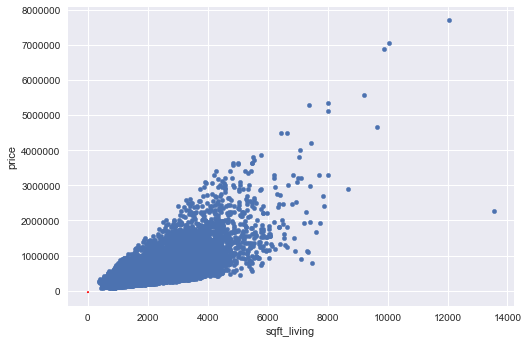

In [49]:
# create a DataFrame with the minimum and maximum values of bathrooms
X_new = pd.DataFrame({'sqft_living': [df.bathrooms.min(), df.bathrooms.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new) #predicts the start/end of line
print (preds)

# first, plot the observed data and the least squares line
df.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

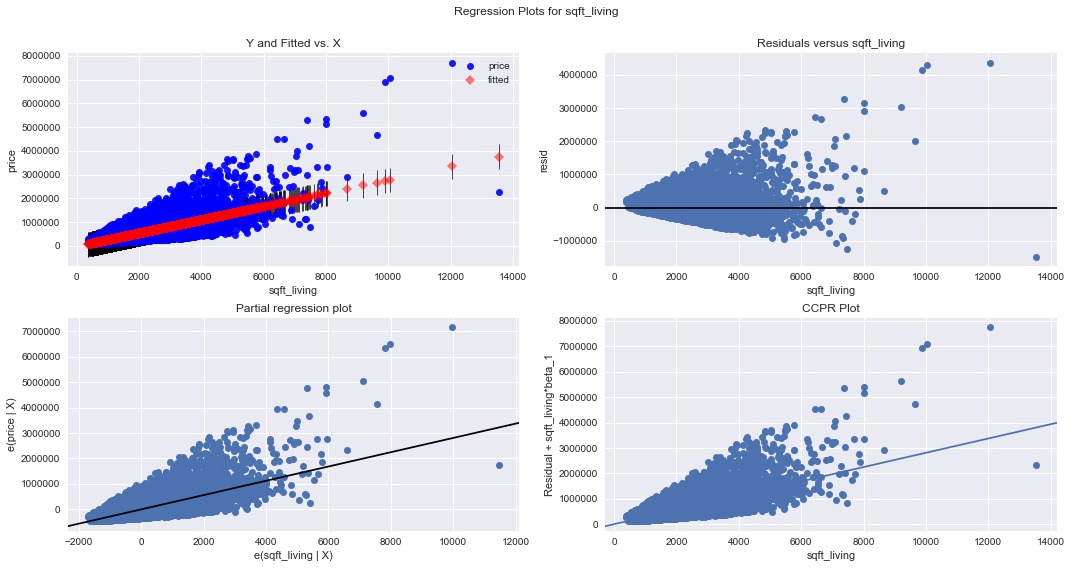

In [50]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


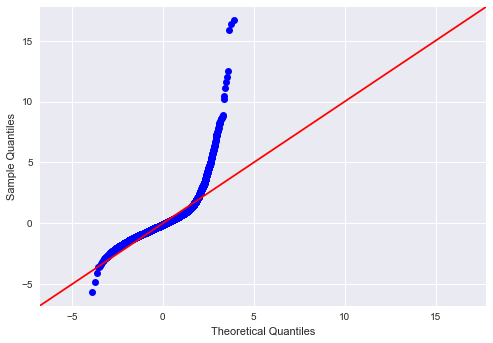

In [51]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [52]:
# consider dropping outliers, log scaling my target, or a different type of model

In [53]:
print(x_cols)

['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'class_scale']


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [55]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

NameError: name 'y' is not defined

# SK Learn

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#create X and y 
features = ['sqft_living']
X = df[features]
y = df.price

#instiatiate and fit 
slr = LinearRegression()
slr.fit(X, y)

#print coefficients 
print(slr.intercept_)
print(slr.coef_)

-43988.89219422743
[280.86301436]


# Feature Scaling and Normalizing the Data

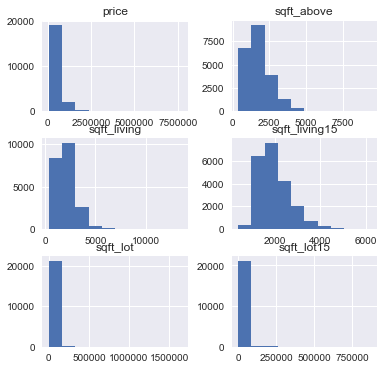

In [58]:
df[['price', 'sqft_living', 'sqft_lot', 'sqft_living15','sqft_above','sqft_lot15']].hist(figsize  = [6, 6]); 

In [57]:
X = df[['grade', 'sqft_living15']]
y = df['price']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,3.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0


In [65]:
f = 'price~sqft_living'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:54:32   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
#create X and y 
features = ['living']
X = df[features]
y = df.price

#instiatiate and fit 
slr = LinearRegression()
slr.fit(X, y)

#print coefficients 
print(slr.intercept_)
print(slr.coef_)

KeyError: "None of [Index(['living'], dtype='object')] are in the [columns]"

In [67]:
#sklearn 
# create X and y
feature_cols = ['grade']
X = df[feature_cols]
y = df.price

# instantiate and fit
mlr = LinearRegression()
mlr.fit(X, y)

# print the coefficients
print(mlr.intercept_)
print(mlr.coef_)

-1061415.9916200666
[209157.77607214]


C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 0, 'price')

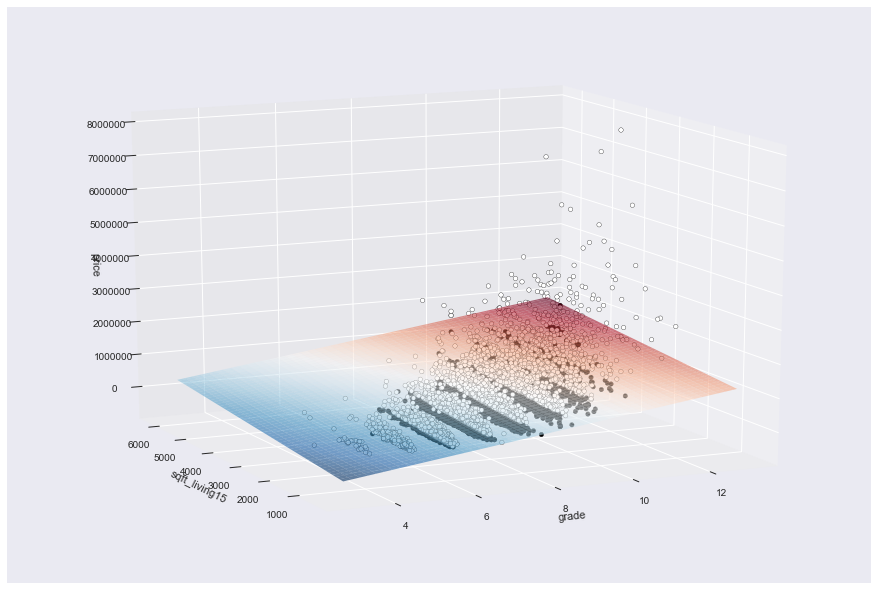

In [68]:
from mpl_toolkits.mplot3d import Axes3D

X = df[['grade', 'sqft_living15']]
y = df['price']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.grade.min(), X.grade.max(), 100),
np.linspace(X.sqft_living15.min(), X.sqft_living15.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].grade, X[resid >= 0].sqft_living15, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].grade, X[resid < 0].sqft_living15, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('grade')
ax.set_ylabel('sqft_living15')
ax.set_zlabel('price')

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


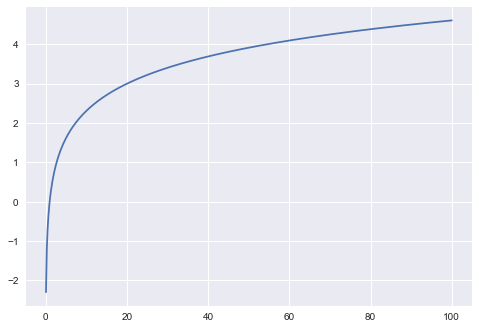

In [69]:
x = np.linspace(start=-100, stop=100, num=10**3) 
y = np.log(x) 
plt.plot(x, y)

In [70]:
outcome = 'price'
x_cols = ['grade', 'bathrooms', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     6561.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:54:34   Log-Likelihood:            -3.0039e+05
No. Observations:               21597   AIC:                         6.008e+05
Df Residuals:                   21593   BIC:                         6.008e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.668e+05   1.31e+04    -65.940      0.000   -8.93e+05   -8.41e+05
grade          1.412e+05   2464.735     57.301      0.000    1.36e+05    1.46e+05
bathrooms      5.346e+04   3204.576     16.683      0.000    4.72e+04    5.97e+04
sqft_living15   106.9536      3.832     27.914      0.000      99.444     114.464
==============================================================================
Omnibus:                    19794.679   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2071817.464
Skew:                           4.044   Prob(JB):                         0.00
Kurtosis:                      50.296   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple Linear Regression

In [71]:
f = 'price ~ bedrooms + grade + sqft_living15'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     6435.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:54:34   Log-Likelihood:            -3.0049e+05
No. Observations:               21597   AIC:                         6.010e+05
Df Residuals:                   21593   BIC:                         6.010e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.503e+05   1.33e+04    -71.279      0.000   -9.76e+05   -9.24e+05
bedrooms       1.899e+04   2147.991      8.843      0.000    1.48e+04    2.32e+04
grade          1.574e+05   2226.522     70.704      0.000    1.53e+05    1.62e+05
sqft_living15   111.2517      3.874     28.718      0.000     103.659     118.845
==============================================================================
Omnibus:                    20233.839   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2308564.261
Skew:                           4.169   Prob(JB):                         0.00
Kurtosis:                      52.959   Cond. No.                     1.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
features = ['bedrooms', 'grade', 'sqft_living15']
X = df[features]
y = df.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)

[1.89944956e+04 1.57424198e+05 1.11251654e+02]


In [73]:
list(zip(features, mlr.coef_))

[('bedrooms', 18994.495610074857),
 ('grade', 157424.19751077492),
 ('sqft_living15', 111.25165358595174)]

# Geopandas

In [74]:
import geopandas as gpd

In [91]:
conda install -c conda-forge descartes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\15514\anaconda3\envs\learn-env

  added / updated specs:
    - descartes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    descartes-1.1.0            |             py_4           7 KB  conda-forge
    matplotlib-base-3.2.2      |   py36hfa737b6_1         7.0 MB  conda-forge
    openssl-1.1.1i             |       h8ffe710_0         5.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        12.7 MB

The following NEW packages will be INSTALLED:

  descartes          conda-forge/noarch::descartes-1.1.0-py_4
  matplotlib-base    conda-forge/win-64::matplotlib-base-3.2.2-py36hfa737b6_1

The following packages will be UPDATED:

  openssl                                 1.1.1h-he774522_0 --> 1.1.1i-h8ffe710_0




matplot

In [75]:
from osgeo import gdal, ogr, osr
from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
import descartes
from shapely.geometry import Point, Polygon
gdal.VersionInfo()

ModuleNotFoundError: No module named 'descartes'

In [76]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,3.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0


In [77]:
crs = {'init': 'epsg:4326'}
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,3.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0


In [78]:
# transform lat and long into a list of shapely.Point objects and set it as a geometry
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geometry[:3]

In [199]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.long, df.lat))

In [200]:
gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_scale,geometry
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.0,POINT (-122.25700 47.51120)
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,POINT (-122.31900 47.72100)
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,3.0,POINT (-122.23300 47.73790)
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2.0,POINT (-122.39300 47.52080)
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0,POINT (-122.04500 47.61680)


Read in Shapely file

In [86]:
street_map = gpd.read_file('parcel_address.shp')

In [94]:
street_map.head()

,MAJOR,MINOR,PIN,COMMENTS,SITETYPE,SITEID,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,...,PROPTYPE,ALIAS1,ALIAS2,KCA_ZONING,KCA_ACRES,PREUSE_COD,PREUSE_DES,Shape_Leng,Shape_Area,geometry
0,000020,0001,0000200001,None,None,0.0,None,None,None,None,...,C,None,None,M2,8.419995,332,"Right of Way/Utility, Road",4889.930132,367602.325773,"POLYGON ((1292406.947 163632.750, 1292403.890 ..."
1,000020,0003,0000200003,None,None,0.0,None,None,None,None,...,C,None,None,GC-MU,0.123967,316,Vacant(Industrial),330.703714,5453.966925,"POLYGON ((1291851.881 164093.646, 1291851.812 ..."
2,000020,0006,0000200006,ALI fallout,R1,604745.0,7211,S,None,180TH,...,C,None,None,GC-MU,0.137994,106,Office Building,340.002037,6000.064501,"POLYGON ((1291617.618 164110.078, 1291617.573 ..."
3,000020,0007,0000200007,None,C1,600178.0,7209,S,None,180TH,...,C,None,None,GC-MU,0.165289,106,Office Building,360.002087,7200.080077,"POLYGON ((1291566.001 164051.882, 1291564.343 ..."
4,000020,0008,0000200008,None,None,0.0,None,None,None,None,...,C,None,None,GC-MU,0.136524,309,Vacant(Commercial),317.359849,6068.041700,"POLYGON ((1291506.025 164053.610, 1291504.365 ..."


Plot Kings County, WA shapely file

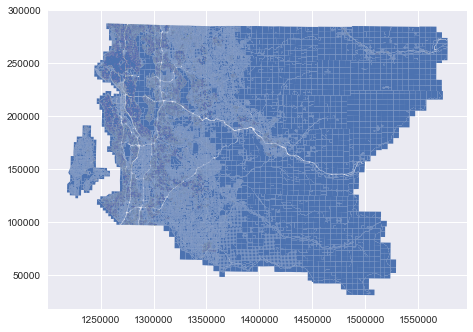

In [95]:
street_map.plot()

In [97]:
# Create a output path for the data
out = r"parcel_address_SELECTION.shp"

# Select first 50 rows
selection = street_map[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out)

In [100]:
street_map2 = gpd.read_file('parcel_address_SELECTION.shp')
street_map2['geometry'].head()

0    POLYGON ((1292406.947 163632.750, 1292403.890 ...
1    POLYGON ((1291851.881 164093.646, 1291851.812 ...
2    POLYGON ((1291617.618 164110.078, 1291617.573 ...
3    POLYGON ((1291566.001 164051.882, 1291564.343 ...
4    POLYGON ((1291506.025 164053.610, 1291504.365 ...
Name: geometry, dtype: geometry

In [101]:
selection = street_map2[0:5]

In [102]:
# getting the areas for each polygon area
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))


Polygon area at index 0 is: 367495.694
Polygon area at index 1 is: 5446.331
Polygon area at index 2 is: 6000.065
Polygon area at index 3 is: 7200.080
Polygon area at index 4 is: 6068.042


In [103]:
street_map2['area'] = street_map2.area

In [104]:
street_map2['area'].head()

0    367495.693852
1      5446.331002
2      6000.064501
3      7200.080078
4      6068.041700
Name: area, dtype: float64

In [105]:
# Maximum area
max_area = street_map2['area'].max()

# Mean area
mean_area = street_map2['area'].mean()

print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(mean_area, 2)))

Max area: 6445247.8
Mean area: 335494.25


In [ ]:
street_map.plot(face)

In [209]:

features = ['grade', 'sqft_living', '3.0']
X = gdf[features]
y = gdf.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)

KeyError: "['3.0'] not in index"

In [207]:
f = 'price ~ grade + sqft_living + class_scale_3.0'
model = ols(formula=f, data=gdf).fit()
model.summary()

PatsyError: numbers besides '0' and '1' are only allowed with **
    price ~ grade + sqft_living + 3.0
                                  ^^^

In [214]:
std_scale = preprocessing.StandardScaler().fit(df[['3.0']])
df_std = std_scale.transform(df[['3.0']])


KeyError: "None of [Index(['3.0'], dtype='object')] are in the [columns]"

In [212]:
print('Mean after standardization:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,2].mean(), df_std[:,3].mean(), df_std[:,4].mean()))
print('\nStandard deviation after standardization:\nsqft_living={:.2f}, sqft_lot={:.2f}, sqft_living15={:.2f}, sqft_above={:.2f}, sqft_lot15={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].std(), df_std[:,3].std(), df_std[:,4].std()))

Mean after standardization:
sqft_living=-0.00, sqft_lot=0.00, sqft_living15=0.00, sqft_above=0.00, sqft_lot15=0.00

Standard deviation after standardization:
sqft_living=1.00, sqft_lot=1.00, sqft_living15=1.00, sqft_above=1.00, sqft_lot15=1.00


Now map each area by by rural vs. urban and by class to the map
    - 3's green
    - 2's blue
    - 1's yellow